In [196]:
import pandas as pd

In [197]:
pwd

'/Users/glorialim/Cosc 301/project-data-301-project-53'

In [198]:
ls

CODE_OF_CONDUCT.md  PROJECTHen.ipynb    data/               project.ipynb
LICENSE             README.md           images/
LifeExpectancy.csv  analysis/           presentation/


In [222]:
#This is the file this is being read
df1 = pd.read_csv("LifeExpectancy.csv") 
#Did not specify the sep parameter, so this file has comma as delimiters

In [223]:
df1.head()

,Entity,Year,LifeExpectancy
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999


In [224]:
df1.rename(columns={'Entity':'Country'},inplace=True)
df1.rename(columns={'LifeExpectancy':'LifeExp'}, inplace=True)
#Renamed a data column to understand the data better
df1

,Country,Year,LifeExp
0,Australia,1802,34.049999
1,Australia,1803,34.049999
2,Australia,1804,34.049999
3,Australia,1805,34.049999
4,Australia,1806,34.049999
...,...,...,...
3248,United States,2012,78.940002
3249,United States,2013,78.959999
3250,United States,2014,78.940002
3251,United States,2015,78.870003


In [225]:
avg=(df1.groupby(['Country', 'Year'], as_index=False).mean()
 .groupby('Country')['LifeExp'].mean())
avg
#The average of each countries life expectancy

Country
Australia         54.290000
Brazil            42.392292
Canada            55.778533
China             41.452839
France            53.691717
Germany           52.880939
India             34.292578
Italy             49.226360
Japan             50.345707
Mexico            40.835629
Russia            41.992980
Spain             47.588779
Switzerland       55.246037
United Kingdom    55.591947
United States     54.651060
Name: LifeExp, dtype: float64

In [226]:
df1.groupby('Country').LifeExp.transform('mean')

0       54.29000
1       54.29000
2       54.29000
3       54.29000
4       54.29000
          ...   
3248    54.65106
3249    54.65106
3250    54.65106
3251    54.65106
3252    54.65106
Name: LifeExp, Length: 3253, dtype: float64

In [230]:
df1['LifeExpAvg']=df1.groupby('Country').LifeExp.transform('mean')
df1

,Country,Year,LifeExp,LifeExpAvg
0,Australia,1802,34.049999,54.29000
1,Australia,1803,34.049999,54.29000
2,Australia,1804,34.049999,54.29000
3,Australia,1805,34.049999,54.29000
4,Australia,1806,34.049999,54.29000
...,...,...,...,...
3248,United States,2012,78.940002,54.65106
3249,United States,2013,78.959999,54.65106
3250,United States,2014,78.940002,54.65106
3251,United States,2015,78.870003,54.65106


TASK 2: Step 1

In [231]:
import numpy as np

In [233]:
df2 = (
    df1.rename(columns={"LifeExp":"LifeExpectancy"})
    .assign(color_filter=lambda x: np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    .query("LifeExpectancy > 1 and color_filter == 1")
    .sort_values('Country', ascending=True)
    .reset_index(drop=True)
    .loc[:, ['Country', 'LifeExpectancy', 'Year', 'LifeExpAvg']]
)

df2

,Country,LifeExpectancy,Year,LifeExpAvg
0,Australia,34.049999,1802,54.29000
1,Australia,65.820000,1939,54.29000
2,Australia,66.260002,1940,54.29000
3,Australia,66.139999,1941,54.29000
4,Australia,65.879997,1942,54.29000
...,...,...,...,...
3234,United States,39.410000,1876,54.65106
3235,United States,39.410000,1877,54.65106
3236,United States,39.410000,1878,54.65106
3237,United States,39.410000,1867,54.65106


TASK 2: Step 2

In [234]:
import seaborn as sns
import os
import matplotlib.pyplot as plt
import statistics as stat

In [235]:
def load_and_process(path):
    df1 = (
            pd.read_csv(path)
            .rename(columns={"LifeExp":"LifeExpectancy"})
            .dropna()
            .sort_values("Entity", ascending=True)
    )
    df2 = (
            df1
            .assign(color_filter=lambda x: np.where((x.Year > 1800) & (x.LifeExpectancy > 0), 1, 0))
    )
    
    return df2

load_and_process('LifeExpectancy.csv')

,Entity,Year,LifeExpectancy,color_filter
0,Australia,1802,34.049999,1
137,Australia,1939,65.820000,1
138,Australia,1940,66.260002,1
139,Australia,1941,66.139999,1
140,Australia,1942,65.879997,1
...,...,...,...,...
3112,United States,1876,39.410000,1
3113,United States,1877,39.410000,1
3114,United States,1878,39.410000,1
3103,United States,1867,39.410000,1


TASK 3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Scatter Plot of Each Country with its Corresponding Life Expectancy Average')

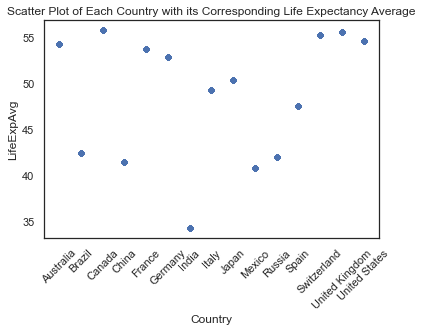

In [237]:
df2.plot(kind='scatter', x='Country', y='LifeExpAvg')
plt.xticks(rotation=45)
plt.title('Scatter Plot of Each Country with its Corresponding Life Expectancy Average')

In [241]:
df2_Canada = df2[(df2['Country'] == 'Canada')]
df2_Canada.sort_values(by=['Year'])

,Country,LifeExpectancy,Year,LifeExpAvg
569,Canada,39.001495,1801,55.778533
570,Canada,39.002995,1802,55.778533
571,Canada,39.004490,1803,55.778533
572,Canada,39.005985,1804,55.778533
573,Canada,39.007484,1805,55.778533
...,...,...,...,...
504,Canada,81.660004,2012,55.778533
505,Canada,81.750000,2013,55.778533
506,Canada,81.790001,2014,55.778533
507,Canada,81.769997,2015,55.778533


Text(0.5, 1.0, 'Life Expectancy over  216 years in Canada')

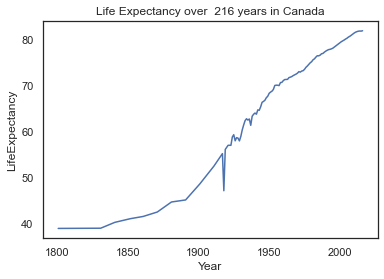

In [243]:
sns.set(font_scale = 1)
sns.set_style('white')
sns.lineplot(x='Year', y='LifeExpectancy', data=df2_Canada, legend='full')
plt.title('Life Expectancy over  216 years in Canada')

In [244]:
df2_Japan = df2[(df2['Country'] == 'Japan')]
df2_Japan.sort_values(by=['Year'])

,Country,LifeExpectancy,Year,LifeExpAvg
1863,Japan,36.400398,1801,50.345707
1864,Japan,36.400795,1802,50.345707
1865,Japan,36.401192,1803,50.345707
1866,Japan,36.401588,1804,50.345707
1867,Japan,36.401989,1805,50.345707
...,...,...,...,...
1799,Japan,83.230003,2012,50.345707
1800,Japan,83.440002,2013,50.345707
1801,Japan,83.690002,2014,50.345707
1802,Japan,83.830002,2015,50.345707


Text(0.5, 1.0, 'Life Expectancy over  216 years in Japan')

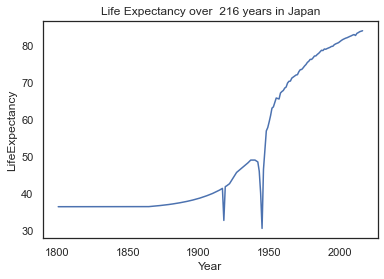

In [245]:
sns.set(font_scale = 1)
sns.set_style('white')
sns.lineplot(x='Year', y='LifeExpectancy', data=df2_Japan, legend='full')
plt.title('Life Expectancy over  216 years in Japan')

Text(0.5, 1.0, 'The Life Expectancy Average for the 15 Different Countries')

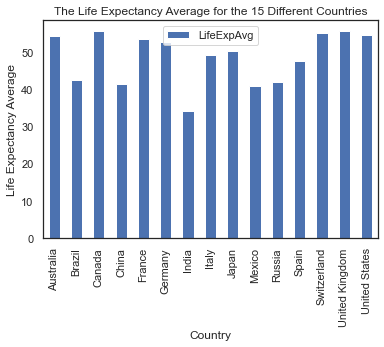

In [212]:
df = pd.DataFrame({'Country': ['Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Italy', 'Japan', 'Mexico', 'Russia', 'Spain', 'Switzerland', 'United Kingdom', 'United States'], 'LifeExpAvg':[54.290000, 42.392292, 55.778533, 41.452839, 53.691717, 52.880939, 34.292578, 49.226360, 50.345707, 40.835629, 41.992980, 47.588779, 55.246037, 55.591947, 54.651060]})
ax = df.plot.bar(x='Country', y='LifeExpAvg', rot=90)
plt.ylabel('Life Expectancy Average')
plt.title('The Life Expectancy Average for the 15 Different Countries')

In [213]:
#TASK 4

#QUESTION -- What can the dataset tell us about the countries well being?

#The dataset tells us that over the years (from 1800 to 2016), the average life expectancy has inreased in all 15 major countries. With that information, we can research and find out the different factors that would contribute to the increase in life expectancy in specific years. According to the pairplot, we can clearly see that over the years the life expectancy is increasing, with a significant slope between the years 1900-1950. Lots of industralizations have occured during those years, and we believe that is one of the reasons why there is a big jump in an increase of life expectancy. 

TASK 4

Question 1: What country has the lowest and highest life expectancy, and why?

From both the scatter plot and bar graph, India has represented the lowest life expectancy. In contrary, Canada, United Kingdom and Switzerland has presented the highest life expectancy. This is expected as India is a developing country, and the other three are developed countries. When looking at the bar graph, it is clearly shown that devleoped countries have higher life expectancy, compared to devloping countries. 

Question 2: Between the 15 different countries, were there any events that had an effect on the life expectancy?

From the line graph, we were able to see that there was a dip in life expectancy around the year 1920 for the countries Canada and Japan (from the line graph we have created above). From our research, there was a signifcant global event that happened between the years 1918-1920, which was the Spanish Flu. The Spanish Flu was a worldwide pandemic, which cost 50 million deaths around the world. 